Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/03/02


In [107]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import stats_toolbox as st

sb.set_style('darkgrid')

ImportError: No module named 'sets'

# Unit 1 Cap Stone :  Improving Allegiant Air Ridership

Wynn Las Vegas and Allegiant Air have teamed up to try get people from the US Midwest to visit Las Vegas and stay at Wynn properties.   Allegiant Air would like to try a new advertising technique aimed at the mid-west to increase rider ship to Las Vegas.  But rather then roll out the new technique to all Midwestern cities that have Allegiant flights to Las Vegas they would like to determine if the technique will increase rider ship before spending the resources and money on such an endeavor. 

In [54]:
# Read in each of the three files, data for 2014, 2015 and 2016
File_2014 = '/media/ianh/space/ThinkfulData/AirCarrierStatisticsUSOnly/2014_943167592_T_T100D_MARKET_US_CARRIER_ONLY.csv'
FlightData_2014 = pd.read_csv(File_2014)
# Unnecessary column removed from data frame 
del FlightData_2014['Unnamed: 13']

# Data for 2015 flights
File_2015 = '/media/ianh/space/ThinkfulData/AirCarrierStatisticsUSOnly/2015_943133173_T_T100D_MARKET_US_CARRIER_ONLY.csv'
FlightData_2015 = pd.read_csv(File_2015)
# Unnecessary column removed from data frame 
del FlightData_2015['Unnamed: 13']

# Data for 2016 flights
File_2016 = '/media/ianh/space/ThinkfulData/AirCarrierStatisticsUSOnly/2016_943125905_T_T100D_MARKET_US_CARRIER_ONLY.csv'
FlightData_2016 = pd.read_csv(File_2016)
# Unnecessary column removed from data frame 
del FlightData_2016['Unnamed: 11']

In [93]:
Las_Vegas_Air_2014 = FlightData_2014.query('DEST_CITY_NAME == "Las Vegas, NV"').query('UNIQUE_CARRIER_NAME == "Allegiant Air"')
Las_Vegas_Air_2015 = FlightData_2015.query('DEST_CITY_NAME == "Las Vegas, NV"').query('UNIQUE_CARRIER_NAME == "Allegiant Air"')
Las_Vegas_Air_2016 = FlightData_2016.query('DEST_CITY_NAME == "Las Vegas, NV"').query('UNIQUE_CARRIER_NAME == "Allegiant Air"')

In [94]:
print("Number of Flights to Las Vegas per Month for Allegiant Air\n")
print("\t %15s %5s %5s\n" % ('2014', '2015', '2016'))
for i in range(1,13):
    print('\tMonth %2d  : %3d %5d %5d' %(i, len(Las_Vegas_Air_2014.query('MONTH == @i')), \
                                        len(Las_Vegas_Air_2015.query('MONTH == @i')), \
                                        len(Las_Vegas_Air_2016.query('MONTH == @i'))))


Number of Flights to Las Vegas per Month for Allegiant Air

	            2014  2015  2016

	Month  1  :  45    46    54
	Month  2  :  46    46    52
	Month  3  :  47    46    52
	Month  4  :  44    49    52
	Month  5  :  45    48    55
	Month  6  :  44    49    54
	Month  7  :  44    50    54
	Month  8  :  45    48    54
	Month  9  :  45    49    55
	Month 10  :  47    52    59
	Month 11  :  46    55    60
	Month 12  :  46    53     0


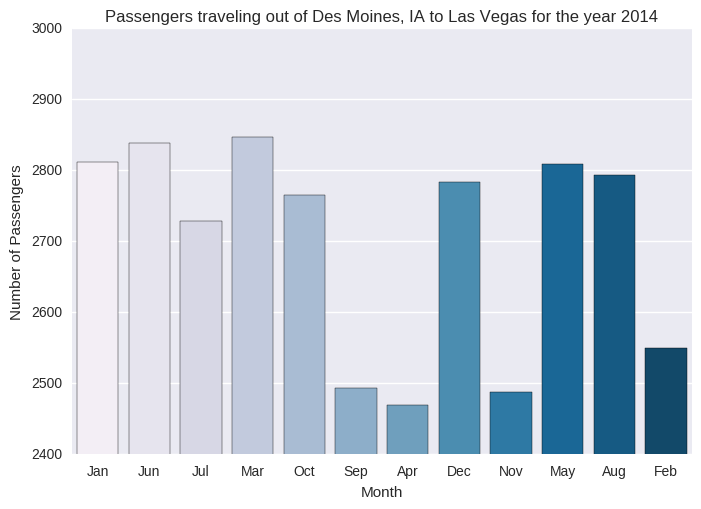

In [115]:
#create a dictionary for the months
month_numToName = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# Create a data structure to house number of passengers by month grouped by origin city of flight.
# Passenger numbers must be accumulated over multiple month instances 
# Month number is transalted to month abbreviation for easy plot viewing.

def CompilePassengerTotalsForCityByMonth(data_frame, index=True, name='Pandas'):
    """
    Computes the mean of the values contained
    within data

    Args:
       data (list): values to have the mean computed for

    Returns: The mean of the values

    Raises: None
    """
    psnger_data = {}
    for row in data_frame.itertuples(index=True, name='Pandas'):
        city   = getattr(row, "ORIGIN_CITY_NAME")
        mth    = getattr(row, "MONTH")
        psngrs = getattr(row, "PASSENGERS")
        month  = month_numToName.get(mth)
        if city in psnger_data:
            inner = psnger_data.get(city)
            if month in inner:
                number_of_pass = inner.get(month)
                number_of_pass += psngrs
                inner[month] = number_of_pass
            else:
                inner[month] = psngrs
        else:
            psnger_data[city] = {month:psngrs}
            
    return psnger_data
        

# Create data frames of monthly passenger totals for Des Moines for all years (2014, 2015, 2016)
passenger_2014_months = CompilePassengerTotalsForCityByMonth(Las_Vegas_Air_2014)
month_list = list(passenger_2014_months.get("Des Moines, IA").keys())
ia_data_2014 = pd.DataFrame.from_dict(passenger_2014_months.get("Des Moines, IA"), orient='index')
ia_data_2014.columns = ['PASSENGERS']
ia_data_2014['MONTH'] = month_list

passenger_2015_months = CompilePassengerTotalsForCityByMonth(Las_Vegas_Air_2015)
month_list = list(passenger_2015_months.get("Des Moines, IA").keys())
ia_data_2015 = pd.DataFrame.from_dict(passenger_2014_months.get("Des Moines, IA"), orient='index')
ia_data_2015.columns = ['PASSENGERS']
ia_data_2015['MONTH'] = month_list

passenger_2016_months = CompilePassengerTotalsForCityByMonth(Las_Vegas_Air_2016)
month_list = list(passenger_2016_months.get("Des Moines, IA").keys())
ia_data_2016 = pd.DataFrame.from_dict(passenger_2016_months.get("Des Moines, IA"), orient='index')
ia_data_2016.columns = ['PASSENGERS']
ia_data_2016['MONTH'] = month_list

# Create bar plot 2014 Des Moines data
ax = sb.barplot(x="MONTH",y="PASSENGERS", data=ia_data_2014, palette="PuBu")
ax.set(xlabel='Month', ylabel='Number of Passengers')
sb.plt.title('Passengers traveling out of Des Moines, IA to Las Vegas for the year 2014')
sb.plt.ylim(2400, 3000)
plt.show()

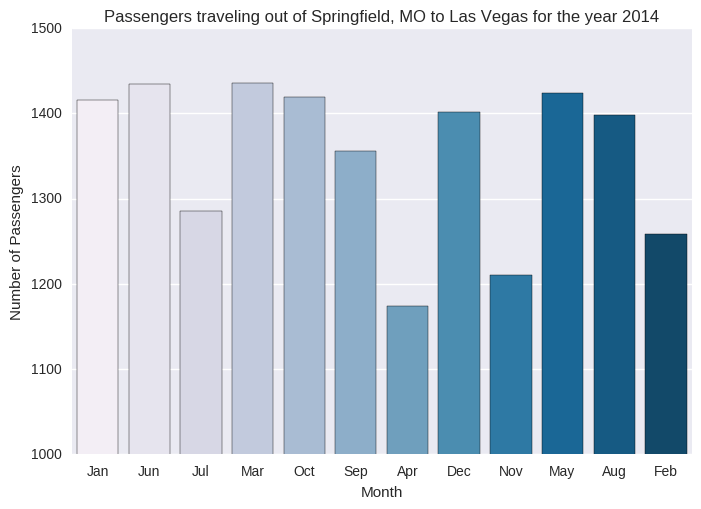

In [116]:
# Create data frame of monthly passenger totals for Springfield, MO - 2014, 2015, 2016
passenger_2014_months = CompilePassengerTotalsForCityByMonth(Las_Vegas_Air_2014)
month_list = list(passenger_2014_months.get("Springfield, MO").keys())
mo_data_2014 = pd.DataFrame.from_dict(passenger_2014_months.get("Springfield, MO"), orient='index')
mo_data_2014.columns = ['PASSENGERS']
mo_data_2014['MONTH'] = month_list

# Plot 2014 data
ax = sb.barplot(x="MONTH",y="PASSENGERS", data=mo_data_2014, palette="PuBu")
ax.set(xlabel='Month', ylabel='Number of Passengers')
sb.plt.title('Passengers traveling out of Springfield, MO to Las Vegas for the year 2014')
sb.plt.ylim(1000, 1500)
plt.show()

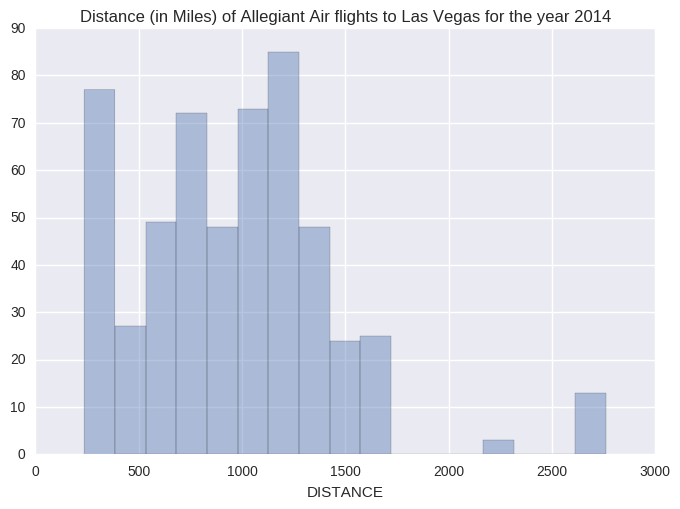

In [92]:
sb.distplot(Las_Vegas_Air_2014.DISTANCE, kde=False, rug=False);
sb.plt.title('Distance (in Miles) of Allegiant Air flights to Las Vegas for the year 2014')
plt.show()

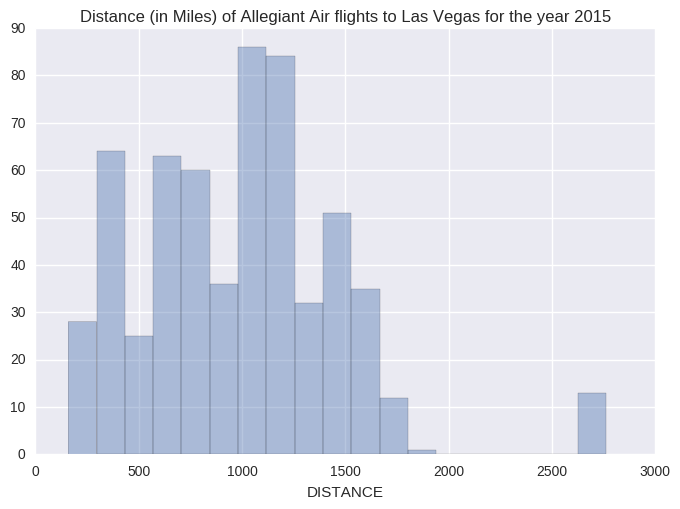

In [11]:
sb.distplot(Las_Vegas_Air_2015.DISTANCE, kde=False, rug=False);
sb.plt.title('Distance (in Miles) of Allegiant Air flights to Las Vegas for the year 2015')
plt.show()

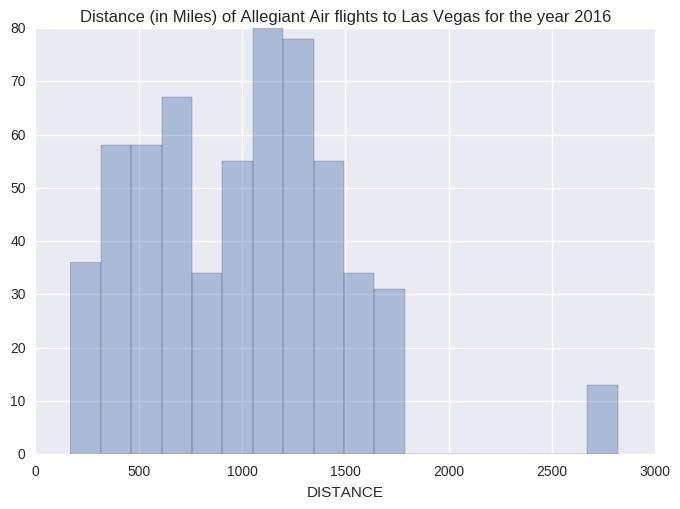

In [12]:
sb.distplot(Las_Vegas_Air_2016.DISTANCE, kde=False, rug=False);
sb.plt.title('Distance (in Miles) of Allegiant Air flights to Las Vegas for the year 2016')
plt.show()